## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
df=pd.read_csv('RegData.csv',header=None)

#### Explore your data

In [3]:
df

,0,1
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
X=df.iloc[:,0].values
y=df.iloc[:,1].values

#### Explore your data

In [5]:
print(X)

[2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]


In [6]:
print(y)

[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot the original data (scatter plot of X,y)

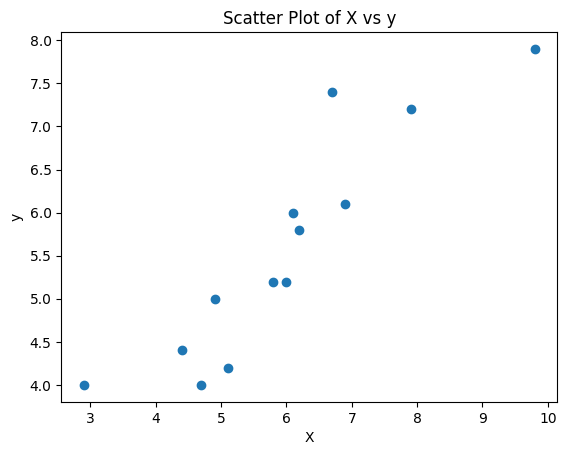

In [7]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of X vs y')
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

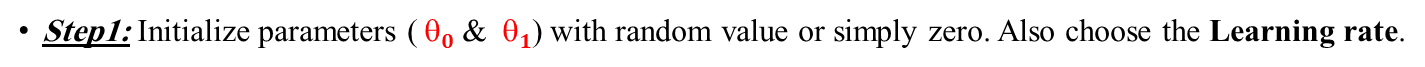

In [8]:
theta0 = 0.0
theta1 = 0.0
alpha = 0.01

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.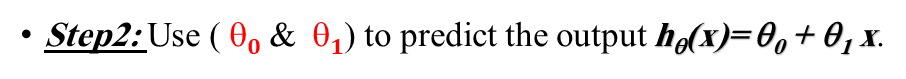
#### Note: you will need to iterate through all data points

In [9]:
h= theta0 + theta1 * X
print(h)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).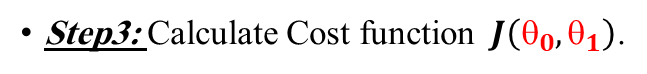
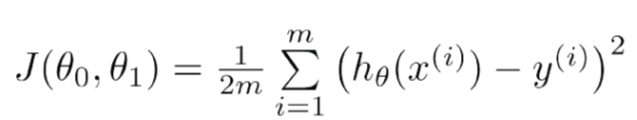

In [10]:
j=1/(2*len(y)) * np.sum((h - y) ** 2)
print(j)

16.305384479692318


### Step4: Calculate the gradient.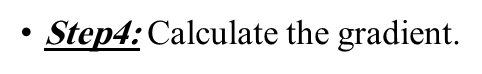
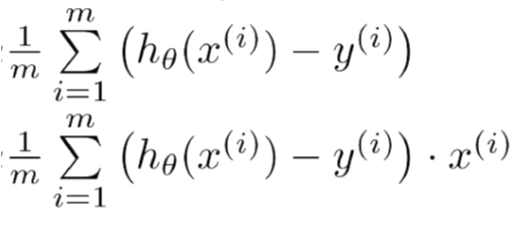

In [11]:
g0= (1/len(y)) * np.sum(h - y)
g1= (1/len(y)) * np.sum((h - y) * X)


### Step5: Update the parameters (simultaneously).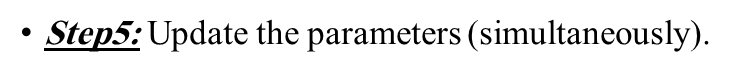
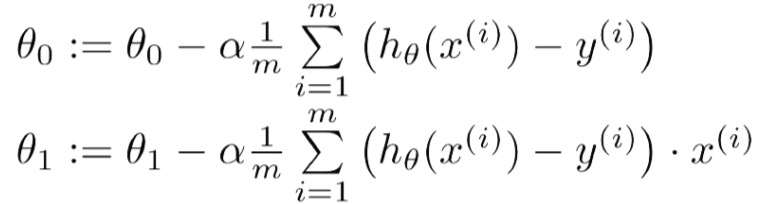

In [12]:
theta0= theta0 - alpha * g0
theta1= theta1 - alpha * g1

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.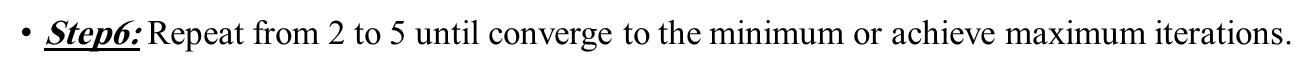

In [13]:
history = []
for i in range(100):
    h= theta0 + theta1 * X
    j=1/(2*len(y)) * np.sum((h - y) ** 2)
    g0= (1/len(y)) * np.sum(h - y)
    g1= (1/len(y)) * np.sum((h - y) * X)
    theta0= theta0 - alpha * g0
    theta1= theta1 - alpha * g1
    history.append(j)
    if i % 1000 == 0:
        print(f"Iteration {i}: Cost {j}, theta0 {theta0}, theta1 {theta1}")


Iteration 0: Cost 6.175608808043305, theta0 0.08996312489803085, theta1 0.5638229867322322


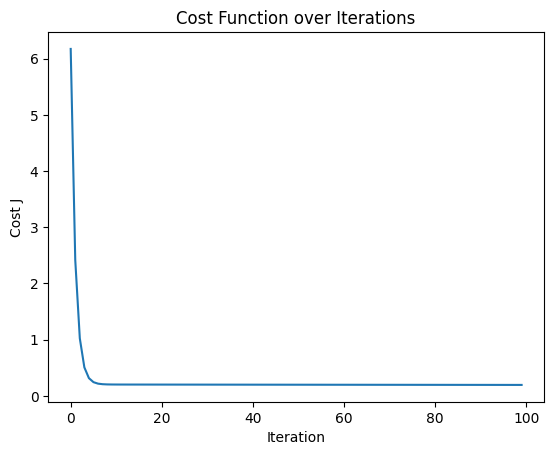

In [14]:
plt.plot(history)
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.title('Cost Function over Iterations')
plt.show()

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [15]:
print(X)
print(h)
print(y)

[2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]
[2.78826268 6.14440397 4.55465296 7.20423839 8.88230925 6.32104325
 5.61448697 5.7028064  5.52616754 4.73129182 4.37801368 4.11305539
 5.34952868]
[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

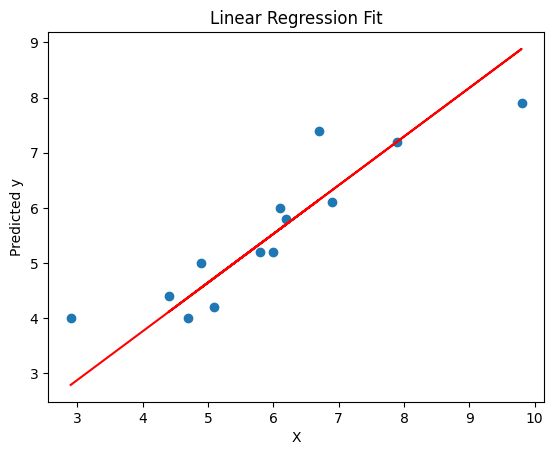

In [16]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of X vs y')
plt.plot(X, h, color='red')
plt.xlabel('X')
plt.ylabel('Predicted y')
plt.title('Linear Regression Fit')
plt.show()


#### Use R2 score to evaluate LR equation output
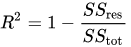
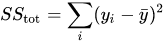
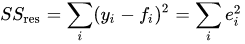
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [17]:
r2=1 - (np.sum((y - h) ** 2) / np.sum((y - np.mean(y)) ** 2))
print(f"R-squared: {r2}")

R-squared: 0.7563025293243408


## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [18]:
ons=np.ones((X.shape[0], 1))
X=np.c_[ons, X]  # Add intercept term
print(X)

[[1.         2.9000001 ]
 [1.         6.69999981]
 [1.         4.9000001 ]
 [1.         7.9000001 ]
 [1.         9.80000019]
 [1.         6.9000001 ]
 [1.         6.0999999 ]
 [1.         6.19999981]
 [1.         6.        ]
 [1.         5.0999999 ]
 [1.         4.69999981]
 [1.         4.4000001 ]
 [1.         5.80000019]]


In [19]:

theta=np.zeros(X.shape[1])
alpha = 0.01

history = []
for i in range(100):
    h= np.dot(X, theta)
    j=1/(2*len(y)) * np.sum((h - y) ** 2)
    g= (1/len(y)) * np.dot(X.T, (h - y))
    theta= theta - alpha * g
    history.append(j)
    if i % 10000 == 0:
        print(f"Iteration {i}: Cost {j}, theta {theta}")


Iteration 0: Cost 16.305384479692318, theta [0.05569231 0.35043846]


#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

In [20]:
print(X)
print(h)
print(y)

[[1.         2.9000001 ]
 [1.         6.69999981]
 [1.         4.9000001 ]
 [1.         7.9000001 ]
 [1.         9.80000019]
 [1.         6.9000001 ]
 [1.         6.0999999 ]
 [1.         6.19999981]
 [1.         6.        ]
 [1.         5.0999999 ]
 [1.         4.69999981]
 [1.         4.4000001 ]
 [1.         5.80000019]]
[2.78780404 6.14444354 4.55445655 7.2044353  8.88275526 6.32110905
 5.61444788 5.70278042 5.52611534 4.73112163 4.37779104 4.11279342
 5.34945025]
[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


In [21]:
r2=1 - (np.sum((y - h) ** 2) / np.sum((y - np.mean(y)) ** 2))
print(f"R-squared: {r2}")

R-squared: 0.7562121405620781


## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

### Plot loss vs. iterations

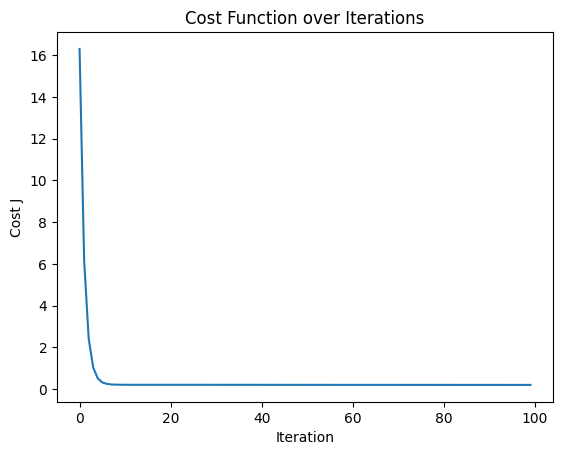

In [22]:
plt.plot(history)
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.title('Cost Function over Iterations')
plt.show()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [23]:
df = pd.read_csv('MultipleLR.csv',header=None)
print(df)

     0   1    2    3
0   73  80   75  152
1   93  88   93  185
2   89  91   90  180
3   96  98  100  196
4   73  66   70  142
5   53  46   55  101
6   69  74   77  149
7   47  56   60  115
8   87  79   90  175
9   79  70   88  164
10  69  70   73  141
11  70  65   74  141
12  93  95   91  184
13  79  80   73  152
14  70  73   78  148
15  93  89   96  192
16  78  75   68  147
17  81  90   93  183
18  88  92   86  177
19  78  83   77  159
20  82  86   90  177
21  86  82   89  175
22  78  83   85  175
23  76  83   71  149
24  96  93   95  192


In [24]:
y=df.iloc[:,3].values
df.drop(df.columns[3], axis=1, inplace=True)
X=df.values
ones=np.ones((X.shape[0], 1))
X = np.hstack((ones, X))



In [25]:
print(X)

[[  1.  73.  80.  75.]
 [  1.  93.  88.  93.]
 [  1.  89.  91.  90.]
 [  1.  96.  98. 100.]
 [  1.  73.  66.  70.]
 [  1.  53.  46.  55.]
 [  1.  69.  74.  77.]
 [  1.  47.  56.  60.]
 [  1.  87.  79.  90.]
 [  1.  79.  70.  88.]
 [  1.  69.  70.  73.]
 [  1.  70.  65.  74.]
 [  1.  93.  95.  91.]
 [  1.  79.  80.  73.]
 [  1.  70.  73.  78.]
 [  1.  93.  89.  96.]
 [  1.  78.  75.  68.]
 [  1.  81.  90.  93.]
 [  1.  88.  92.  86.]
 [  1.  78.  83.  77.]
 [  1.  82.  86.  90.]
 [  1.  86.  82.  89.]
 [  1.  78.  83.  85.]
 [  1.  76.  83.  71.]
 [  1.  96.  93.  95.]]


In [26]:
print(y)

[152 185 180 196 142 101 149 115 175 164 141 141 184 152 148 192 147 183
 177 159 177 175 175 149 192]


In [27]:
theta=np.zeros(X.shape[1])
alpha = 0.0001

### Repeat your implementation but for more than one variable

In [28]:
history = []
for i in range(100000):
    h= np.dot(X, theta)
    j=1/(2*len(y)) * np.sum((h - y) ** 2)
    g= (1/len(y)) * np.dot(X.T, (h - y))
    theta= theta - alpha * g
    history.append(j)
    if i % 10000 == 0:
        print(f"Iteration {i}: Cost {j}, theta0 {theta0}, theta1 {theta1}")


Iteration 0: Cost 13405.98, theta0 0.22783493929905596, theta1 0.8830641270944536
Iteration 10000: Cost 3.04428856782712, theta0 0.22783493929905596, theta1 0.8830641270944536
Iteration 20000: Cost 3.037654036374625, theta0 0.22783493929905596, theta1 0.8830641270944536
Iteration 30000: Cost 3.0312704785542217, theta0 0.22783493929905596, theta1 0.8830641270944536
Iteration 40000: Cost 3.0251284004276027, theta0 0.22783493929905596, theta1 0.8830641270944536
Iteration 50000: Cost 3.019218667207533, theta0 0.22783493929905596, theta1 0.8830641270944536
Iteration 60000: Cost 3.0135324896610354, theta0 0.22783493929905596, theta1 0.8830641270944536
Iteration 70000: Cost 3.008061411037652, theta0 0.22783493929905596, theta1 0.8830641270944536
Iteration 80000: Cost 3.0027972944921215, theta0 0.22783493929905596, theta1 0.8830641270944536
Iteration 90000: Cost 2.9977323109829355, theta0 0.22783493929905596, theta1 0.8830641270944536


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [29]:
print(h)

[152.8871613  184.67952957 181.45078836 199.01047429 139.76245979
 104.9828328  150.53665927 113.8418558  174.34937677 164.4413376
 143.87057323 142.69834194 186.1385805  152.75488701 151.49424751
 188.61418434 144.06630296 181.47272139 177.09100023 158.53254168
 176.29667847 174.4566983  167.6050747  151.01618892 190.67786673]


### Plot loss vs. iterations

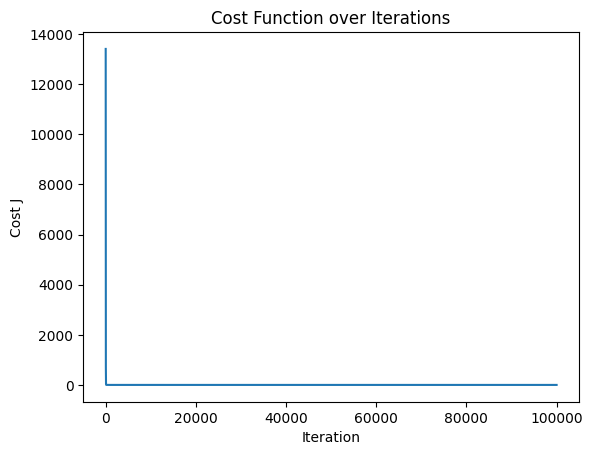

In [30]:
plt.plot(history)
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.title('Cost Function over Iterations')
plt.show()

#### Use R2 score to evaluate LR equation output

In [31]:
r2=1 - (np.sum((y - h) ** 2) / np.sum((y - np.mean(y)) ** 2))
print(f"R-squared: {r2}")

R-squared: 0.9892148899685773


# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [33]:
df=pd.read_csv('RegData.csv',header=None)

In [34]:
X=df.iloc[:,0].values
y=df.iloc[:,1].values

In [35]:
print(X)
print(y)

[2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]
[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Train the model (fit the model to the training data)

In [36]:
model=LinearRegression()
model.fit(X.reshape(-1, 1), y)

LinearRegression()

#### Predict y values using the trained model

In [37]:
y_pred=model.predict(X.reshape(-1, 1))

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

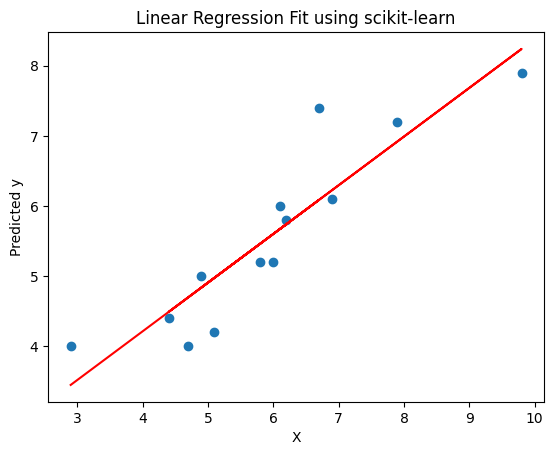

In [38]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of X vs y')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Predicted y')
plt.title('Linear Regression Fit using scikit-learn')
plt.show()

#### Use R2 score to evaluate model output

In [39]:
r2=r2_score(y, y_pred)
print(f"R-squared using scikit-learn: {r2}")

R-squared using scikit-learn: 0.8213156778363777


### Repeat for Mulivariate

In [40]:
df=pd.read_csv('MultipleLR.csv',header=None)

In [41]:
y=df.iloc[:,3].values
df.drop(df.columns[3], axis=1, inplace=True)
X=df.values

In [42]:
print(X.shape)

(25, 3)


In [43]:
print(X.shape)
print(y.shape)

(25, 3)
(25,)


In [44]:
model=LinearRegression()
model.fit(X, y)

LinearRegression()

In [45]:
y_pred=model.predict(X)

In [46]:
r2=r2_score(y, y_pred)
print(f"R-squared using scikit-learn: {r2}")

R-squared using scikit-learn: 0.9896615789448399


In [47]:
print(y)
print(y_pred)

[152 185 180 196 142 101 149 115 175 164 141 141 184 152 148 192 147 183
 177 159 177 175 175 149 192]
[152.60720439 185.08011472 181.78158547 199.74522647 139.1747207
 103.69391793 150.2632274  112.82069728 174.55948394 164.49442094
 143.42337551 142.23416416 186.54285759 152.40794527 151.24409108
 189.12496613 143.50219218 181.89389361 177.29838914 158.34934019
 176.57742415 174.66365778 167.68889392 150.63279846 191.1954116 ]
